In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load and flatten dataset

In [2]:
digits = load_digits()
X = digits.data      # already flattened: (n_samples, 64)
y = digits.target

print(X.shape, y.shape)


(1797, 64) (1797,)


In [4]:
# Train–test split and scaling

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# PCA, explained variance plot, and reduced datasets

In [ ]:
# Fit PCA once and plot cumulative variance (deliverable 1)

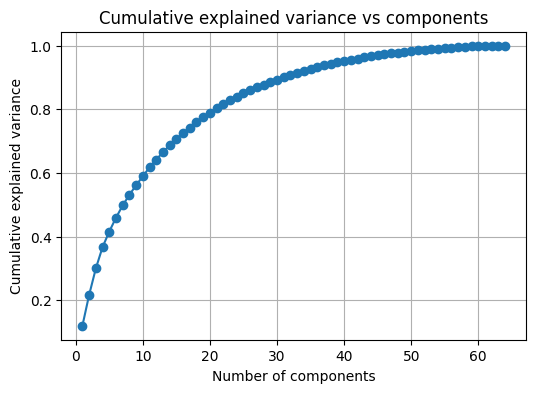

In [7]:
pca_full = PCA()          # keep all components
pca_full.fit(X_train_scaled)

expl_var = pca_full.explained_variance_ratio_           # per component [web:21]
cum_expl_var = np.cumsum(expl_var)                      # cumulative [web:16]

plt.figure(figsize=(6,4))
plt.plot(range(1, len(expl_var)+1), cum_expl_var, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance vs components")
plt.grid(True)
plt.show()


In [8]:
# Create reduced datasets (deliverable 2)

In [9]:
components_list = [2, 10, 30, 50]
reduced_data = {}   # to store transformed datasets

for n in components_list:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    reduced_data[n] = (X_train_pca, X_test_pca)
    print(f"n_components={n}, cumulative variance={pca.explained_variance_ratio_.cumsum()[-1]:.4f}")


n_components=2, cumulative variance=0.2170
n_components=10, cumulative variance=0.5898
n_components=30, cumulative variance=0.8933
n_components=50, cumulative variance=0.9833


In [10]:
import pandas as pd

n = 30  # for example
X_train_pca, X_test_pca = reduced_data[n]

pd.DataFrame(X_train_pca).to_csv("digits_train_pca_30.csv", index=False)
pd.DataFrame(X_test_pca).to_csv("digits_test_pca_30.csv", index=False)


In [ ]:
# Logistic Regression on original vs PCA data (accuracy comparison)

In [ ]:
# Baseline on original scaled data


In [11]:
log_reg = LogisticRegression(max_iter=1000, multi_class="auto")
log_reg.fit(X_train_scaled, y_train)

y_pred_base = log_reg.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)
print("Baseline accuracy (no PCA):", acc_base)


Baseline accuracy (no PCA): 0.9722222222222222


C:\Users\pranitha\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [12]:
# Models on PCA-reduced data

In [13]:
results = []

for n, (X_train_pca, X_test_pca) in reduced_data.items():
    clf = LogisticRegression(max_iter=1000, multi_class="auto")
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    results.append((n, acc))
    print(f"PCA({n} components) accuracy: {acc:.4f}")


PCA(2 components) accuracy: 0.5250
PCA(10 components) accuracy: 0.8778
PCA(30 components) accuracy: 0.9556
PCA(50 components) accuracy: 0.9667


C:\Users\pranitha\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pranitha\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pranitha\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pranitha\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 an

In [ ]:
# 2D PCA scatter plot

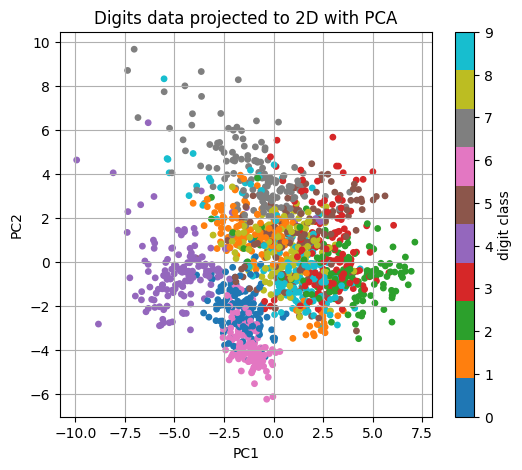

In [14]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_pca_2[:, 0], X_pca_2[:, 1],
    c=y_train, cmap="tab10", s=15
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits data projected to 2D with PCA")
plt.colorbar(scatter, label="digit class")
plt.grid(True)
plt.show()
